In [1]:
from slsim.Sources import supernovae
import matplotlib.pyplot as plt
import numpy as np

from slsim.Sources import random_supernovae
from slsim.Observations.roman_speclite import configure_roman_filters
from slsim.Observations.roman_speclite import filter_names
import speclite

This notebook uses both Roman and LSST filters. The following cell loads the Roman filters.

In [2]:
# generate Roman filters
configure_roman_filters()

# import filter bands and make them recogniable in speclite
roman_filters = filter_names()
# filters are ['Roman-F062', 'Roman-F087', 'Roman-F106', 'Roman-F129', 'Roman-F158', 'Roman-F184', 'Roman-F146', 'Roman-F213']

speclite.filters.load_filters(
    roman_filters[0],
    roman_filters[1],
    roman_filters[2],
    roman_filters[3],
    roman_filters[4],
    roman_filters[5],
    roman_filters[6],
    roman_filters[7],
)

Files used in this notebook can be found at https://github.com/LSST-strong-lensing/data_public

Example: Creating an instance of the supernova class without the model directory uses the sncosmo.Model class, and the source used to initialize it is pulled from sncosmo's list of built in sources. In this specific example, the model does not support redshifts z <= 1.1 for the F213 band.

class      : TimeSeriesSource
name       : None
version    : None
phases     : [-9.7, .., 272.08] days
wavelengths: [1605, .., 25000] Angstroms
parameters:
  amplitude = 3.602109142312445e-17


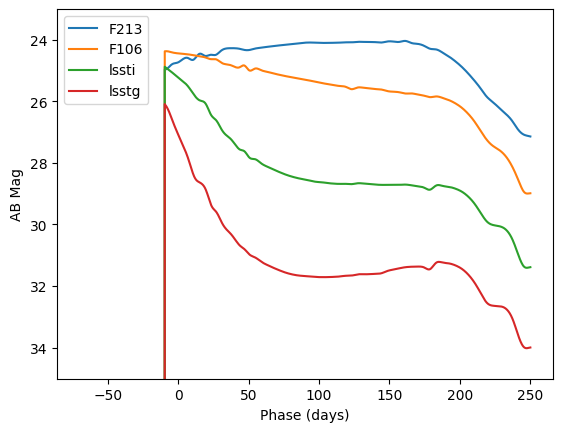

In [3]:
sn_type = "II"
sn_model = "v19-2013am"
modeldir = "C:/Users/cputh/Documents/NON1ASED.V19_CC+HostXT_WAVEEXT"


sn_absolute_mag = -19.3
sn_absolute_zpsys = "ab"
sn_absolute_mag_band = "bessellb"
z = 1.2

my_SN = supernovae.Supernova(
    source=sn_model,
    redshift=z,
    sn_type=sn_type,
    absolute_mag=sn_absolute_mag,
    absolute_mag_band=sn_absolute_mag_band,
    mag_zpsys=sn_absolute_zpsys,
    modeldir=modeldir,
)
print(my_SN.source)

min_mag = 100
time = np.linspace(-70, 250, 1000)
for filt in ["F213", "F106", "lssti", "lsstg"]:
    plt.plot(time, my_SN.get_apparent_magnitude(time, filt), label=filt)
    if my_SN.source.peakmag(filt, sn_absolute_zpsys) < min_mag:
        min_mag = my_SN.source.peakmag(filt, sn_absolute_zpsys)

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Phase (days)")
plt.ylabel("AB Mag")
plt.ylim(bottom=min_mag+10, top=min_mag-2)
plt.show()

If we now include the model directory, an instance of sncosmo.TimeSeriesSource is first created, and this is passed into the sncosmo.Model class. Now the model supports an extended range of wavelengths, so this works for redshifts z <= 1.1. Note that only the upper limit of the supported range of wavelengths is increased; the lower limit is unchanged. Thus, using higher redshifts still results in an error.

class      : TimeSeriesSource
name       : None
version    : None
phases     : [-9.7, .., 272.08] days
wavelengths: [1605, .., 25000] Angstroms
parameters:
  amplitude = 3.602109142312445e-17


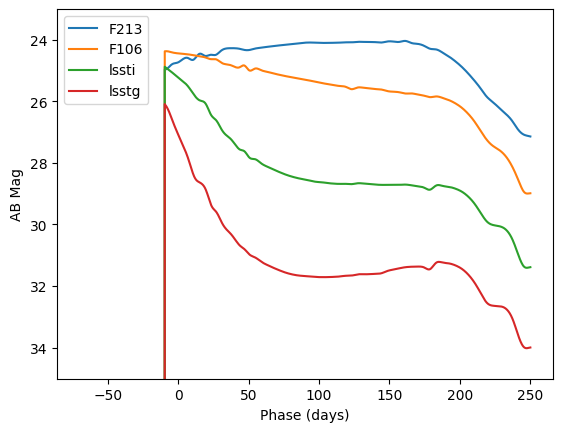

In [4]:
my_SN = supernovae.Supernova(
    source=sn_model,
    redshift=z,
    sn_type=sn_type,
    absolute_mag=sn_absolute_mag,
    absolute_mag_band=sn_absolute_mag_band,
    mag_zpsys=sn_absolute_zpsys,
    modeldir=modeldir,
)

print(my_SN.source)

min_mag = 100
time = np.linspace(-70, 250, 1000)
for filt in ["F213", "F106", "lssti", "lsstg"]:
    plt.plot(time, my_SN.get_apparent_magnitude(time, filt), label=filt)
    if my_SN.source.peakmag(filt, sn_absolute_zpsys) < min_mag:
        min_mag = my_SN.source.peakmag(filt, sn_absolute_zpsys)

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Phase (days)")
plt.ylabel("AB Mag")
plt.ylim(bottom=min_mag+10, top=min_mag-2)
plt.show()

For generating a random supernova, a supernova model is selected at random that matches the specified sn_type. If modeldir is not specified, the supernova model is chosen from sncosmo's built-in list of models. If modeldir is specified, the supernova model is chosen from the available models in the directory.

An optional random seed can be added for reproducibility.

v19-2013ab
class      : TimeSeriesSource
name       : None
version    : None
phases     : [-6.53, .., 192.9] days
wavelengths: [1605, .., 25000] Angstroms
parameters:
  amplitude = 1.38630878568457e-18


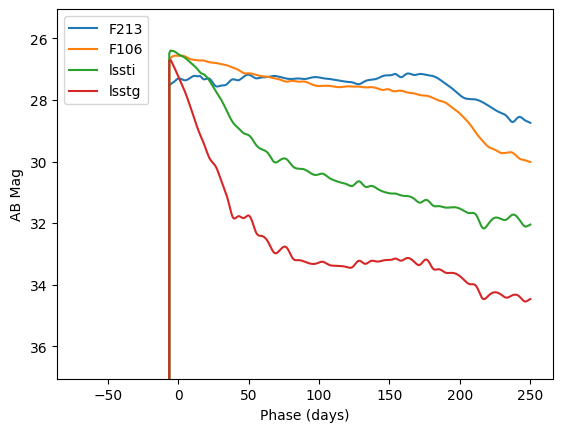

In [5]:
sn_type = "IIP"
modeldir = "C:/Users/cputh/Documents/NON1ASED.V19_CC+HostXT_WAVEEXT/"


random_SN = random_supernovae.RandomizedSupernova(
    sn_type=sn_type,
    redshift=z,
    absolute_mag_band=sn_absolute_mag_band,
    mag_zpsys=sn_absolute_zpsys,
    modeldir=modeldir,
    random_seed=2,
)

# displays the sn model that was randomly chosen
print(random_SN._sncosmo_source)
print(random_SN.source)

min_mag = 100
time = np.linspace(-70, 250, 1000)
for filt in ["F213", "F106", "lssti", "lsstg"]:
    plt.plot(time, random_SN.get_apparent_magnitude(time, filt), label=filt)
    if random_SN.source.peakmag(filt, sn_absolute_zpsys) < min_mag:
        min_mag = random_SN.source.peakmag(filt, sn_absolute_zpsys)

plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Phase (days)")
plt.ylabel("AB Mag")
plt.ylim(bottom=min_mag+10, top=min_mag-2)
plt.show()

For type Ia supernovae, the model directory should be set to the path of the SALT3.NIR_WAVEEXT directory.

class      : SALT3Source
name       : None
version    : None
phases     : [-20, .., 50] days
wavelengths: [2000, .., 25000] Angstroms
parameters:
  x0 = 4.631419598832412e-06
  x1 = 0.0
  c  = 0.0
-20.0


c:\Users\cputh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sncosmo\models.py:189: RuntimeWarning: divide by zero encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


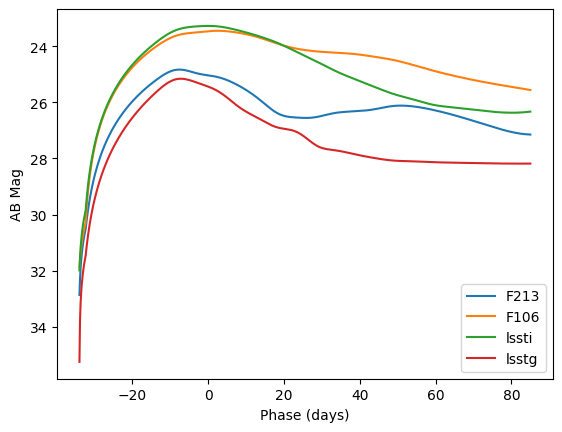

In [6]:
sn_type = "Ia"
sn_model = "salt3-nir"
modeldir = "C:/Users/cputh/Documents/SALT3.NIR_WAVEEXT/"


sn_absolute_mag = -19.3
sn_absolute_zpsys = "ab"
sn_absolute_mag_band = "bessellb"
z = 0.7

my_SN = supernovae.Supernova(
    source=sn_model,
    redshift=z,
    sn_type=sn_type,
    absolute_mag=sn_absolute_mag,
    absolute_mag_band=sn_absolute_mag_band,
    mag_zpsys=sn_absolute_zpsys,
    modeldir=modeldir,
)

print(my_SN.source)
print(my_SN.source.minphase())

time = np.linspace(-50, 100, 1000)
for filt in ["F213", "F106", "lssti", "lsstg"]:
    plt.plot(time, my_SN.get_apparent_magnitude(time, filt), label=filt)
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Phase (days)")
plt.ylabel("AB Mag")
plt.show()

salt3
class      : SALT3Source
name       : None
version    : None
phases     : [-20, .., 50] days
wavelengths: [2000, .., 25000] Angstroms
parameters:
  x0 = 5.061652110982622e-06
  x1 = -1.58688169380922
  c  = -0.19537964099282026


c:\Users\cputh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sncosmo\models.py:189: RuntimeWarning: invalid value encountered in log10
  result[i] = -2.5 * np.log10(f / zpf)


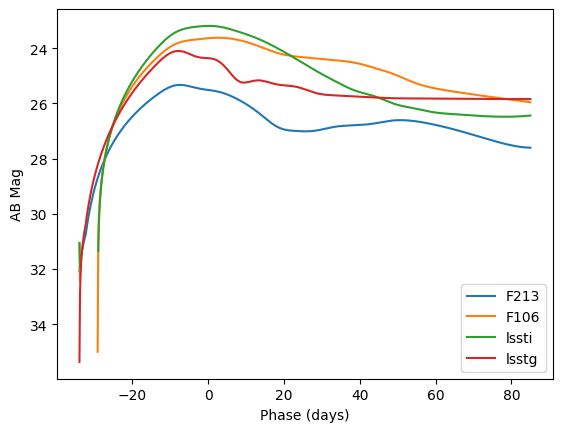

In [7]:
sn_type = "Ia"
modeldir = "C:/Users/cputh/Documents/SALT3.NIR_WAVEEXT/"


random_SN = random_supernovae.RandomizedSupernova(
    sn_type=sn_type,
    redshift=z,
    absolute_mag_band=sn_absolute_mag_band,
    mag_zpsys=sn_absolute_zpsys,
    modeldir=modeldir,
)

# displays the sn model that was randomly chosen
print(random_SN._sncosmo_source)
print(random_SN.source)

time = np.linspace(-50, 100, 1000)
for filt in ["F213", "F106", "lssti", "lsstg"]:
    plt.plot(time, random_SN.get_apparent_magnitude(time, filt), label=filt)
plt.gca().invert_yaxis()
plt.legend()
plt.xlabel("Phase (days)")
plt.ylabel("AB Mag")
plt.show()